### Data Preprocessing - Heart Failure Prediction Dataset (Kaggle: Composition of Cleveland, Hungarian, Statlog, LongBeachVA and Switzerland)
(Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)

In [1]:
# Import necessary libraries
import pandas as pd

# Replace with the actual filepath
file_path = 'D:\DigiEcon\MasterThesis\Technical Implementation\Code Files\Dataset3\heart.csv'

# Read the CSV file
df = pd.read_csv(file_path, sep=',')

# Display the first 5 rows to check it loaded correctly
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


| No. | Feature          | Description                                                                                                                | Values / Range                                                                 |
|-----|------------------|----------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| 1   | Age              | Age of the patient [years]                                                                                                 | Numeric                                                                        |
| 2   | Sex              | Sex of the patient                                                                                                         | M: Male, F: Female                                                             |
| 3   | ChestPainType    | Chest pain type                                                                                                            | TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic |
| 4   | RestingBP        | Resting blood pressure [mm Hg]                                                                                             | Numeric                                                                        |
| 5   | Cholesterol      | Serum cholesterol [mm/dl]                                                                                                  | Numeric                                                                        |
| 6   | FastingBS        | Fasting blood sugar                                                                                                        | 1: if FastingBS > 120 mg/dl, 0: otherwise                                      |
| 7   | RestingECG       | Resting electrocardiogram results                                                                                          | Normal, ST: ST-T wave abnormality, LVH: left ventricular hypertrophy           |
| 8   | MaxHR            | Maximum heart rate achieved                                                                                                | Numeric value between 60 and 202                                               |
| 9   | ExerciseAngina   | Exercise-induced angina                                                                                                    | Y: Yes, N: No                                                                  |
| 10  | Oldpeak          | ST depression induced by exercise relative to rest                                                                         | Numeric                                                                        |
| 11  | ST_Slope         | The slope of the peak exercise ST segment                                                                                  | Up: upsloping, Flat: flat, Down: downsloping                                   |
| 12  | HeartDisease     | Output class                                                                                                               | 1: heart disease, 0: Normal                                                    |


| No. | Feature        | Possible Values                                                                 |
|-----|----------------|---------------------------------------------------------------------------------|
| 2   | Sex            | M: Male, F: Female                                                              |
| 3   | ChestPainType  | TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic |
| 6   | FastingBS      | 1: if FastingBS > 120 mg/dl, 0: otherwise                                       |
| 7   | RestingECG     | Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy            |
| 9   | ExerciseAngina | Y: Yes, N: No                                                                   |
| 11  | ST_Slope       | Up: upsloping, Flat: flat, Down: downsloping                                    |
| 12  | HeartDisease   | 1: heart disease, 0: Normal                                                     |

In [2]:
#Inspect structure = 918 observations and 12 features including the target variable 
print(df.shape)

(918, 12)


In [3]:
#look at the data types =  sex,chestpaintype, restingECG, ExerciseAngina and ST_Slope are objectes, oldpeak is a float, the others inters 
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [4]:
# Define the numerical features 
numerical_cols = [
    'Age', 'RestingBP', 'Cholesterol', 
    'FastingBS', 'MaxHR','Oldpeak',
]

# Compute summary statistics
summary_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max()
}).T.round()

# Add number of unique values as first row
unique_vals = df[numerical_cols].nunique()
summary_stats.loc['Unique Values'] = unique_vals

# Reorder so that "Unique Values" is the first row
summary_stats = summary_stats.reindex(['Unique Values', 'Mean', 'Min', 'Max'])

# Display result
summary_stats

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Unique Values,50.0,67.0,222.0,2.0,119.0,53.0
Mean,54.0,132.0,199.0,0.0,137.0,1.0
Min,28.0,0.0,0.0,0.0,60.0,-3.0
Max,77.0,200.0,603.0,1.0,202.0,6.0


In [5]:
from pandas.api.types import CategoricalDtype

# Define meaningful category orders
category_orders = {
    'ChestPainType': ['TA', 'ATA', 'NAP', 'ASY'],
    'RestingECG': ['Normal', 'ST', 'LVH'],
    'ExerciseAngina': ['N', 'Y'],
    'ST_Slope': ['Down', 'Flat', 'Up'],
    'HeartDisease': [0, 1]
}

code_maps = {}

for col, order in category_orders.items():
    cat_type = CategoricalDtype(categories=order, ordered=True)
    df[col] = df[col].astype(cat_type)
    code_maps[col] = dict(zip(order, range(len(order))))  # category-to-code mapping
    df[col] = df[col].cat.codes

code_maps

{'ChestPainType': {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3},
 'RestingECG': {'Normal': 0, 'ST': 1, 'LVH': 2},
 'ExerciseAngina': {'N': 0, 'Y': 1},
 'ST_Slope': {'Down': 0, 'Flat': 1, 'Up': 2},
 'HeartDisease': {0: 0, 1: 1}}

| Variable        | Code | Label                     |
|-----------------|------|---------------------------|
| ChestPainType   | 0    | TA (Typical Angina)        |
| ChestPainType   | 1    | ATA (Atypical Angina)      |
| ChestPainType   | 2    | NAP (Non-Anginal Pain)     |
| ChestPainType   | 3    | ASY (Asymptomatic)         |
| RestingECG      | 0    | Normal                     |
| RestingECG      | 1    | ST (ST-T wave abnormality) |
| RestingECG      | 2    | LVH (Left ventricular hypertrophy) |
| ExerciseAngina  | 0    | N (No)                     |
| ExerciseAngina  | 1    | Y (Yes)                    |
| ST_Slope        | 0    | Down                       |
| ST_Slope        | 1    | Flat                       |
| ST_Slope        | 2    | Up                         |
| HeartDisease    | 0    | Normal                     |
| HeartDisease    | 1    | Heart disease              |


In [6]:
# Map Female to 0 and Male to 1
sex_mapping = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [7]:
#check if mapping worked
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           0   
1   49    0              2        160          180          0           0   
2   37    1              1        130          283          0           1   
3   48    0              3        138          214          0           0   
4   54    1              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [8]:
import pandas as pd

# Categorical Columns
categorical_cols = [
    'Sex', 'ChestPainType',
    'ST_Slope',
    'RestingECG',
    'ExerciseAngina',
    'HeartDisease'

]

# Create distribution dictionary
distribution_dict = {}

for col in categorical_cols:
    counts = df[col].value_counts().sort_index()
    percents = df[col].value_counts(normalize=True).sort_index() * 100
    combined = counts.astype(str) + ' (' + percents.round(1).astype(str) + '%)'
    distribution_dict[col] = combined

distribution_df = pd.DataFrame(distribution_dict).T.fillna('-')
distribution_df.index.name = 'Variable'
distribution_df.columns.name = 'Value'

# make sure columns are ordered 0,1,2,3…
distribution_df = distribution_df.reindex(sorted(distribution_df.columns, key=int), axis=1)

display(distribution_df)   # or print(distribution_df)

Value,0,1,2,3
Variable,,,,
Sex,193 (21.0%),725 (79.0%),-,-
ChestPainType,46 (5.0%),173 (18.8%),203 (22.1%),496 (54.0%)
ST_Slope,63 (6.9%),460 (50.1%),395 (43.0%),-
RestingECG,552 (60.1%),178 (19.4%),188 (20.5%),-
ExerciseAngina,547 (59.6%),371 (40.4%),-,-
HeartDisease,410 (44.7%),508 (55.3%),-,-


In [9]:
# General overview and check for missing values = no missing values, duplicates were already removed as described by the author 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  HeartDisease    918 non-null    int8   
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


In [10]:
# check again for missing values with is null = none missing values 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
#to get a general overview of the data 
df.describe().round(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,0.79,2.25,132.40,198.80,0.23,0.60,136.81,0.40,0.89,1.36,0.55
std,9.43,0.41,0.93,18.51,109.38,0.42,0.81,25.46,0.49,1.07,0.61,0.50
min,28.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00,0.00,-2.60,0.00,0.00
25%,47.00,1.00,2.00,120.00,173.25,0.00,0.00,120.00,0.00,0.00,1.00,0.00
50%,54.00,1.00,3.00,130.00,223.00,0.00,0.00,138.00,0.00,0.60,1.00,1.00
75%,60.00,1.00,3.00,140.00,267.00,0.00,1.00,156.00,1.00,1.50,2.00,1.00
max,77.00,1.00,3.00,200.00,603.00,1.00,2.00,202.00,1.00,6.20,2.00,1.00


In [12]:
#shows number per unique column to detect columns with variations 
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Check for outliers 
- https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/diagnosis-treatment/drc-20350806?utm_source=chatgpt.com
- https://www.cdc.gov/cholesterol/data-research/facts-stats/index.html?utm_source=chatgpt.com
https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

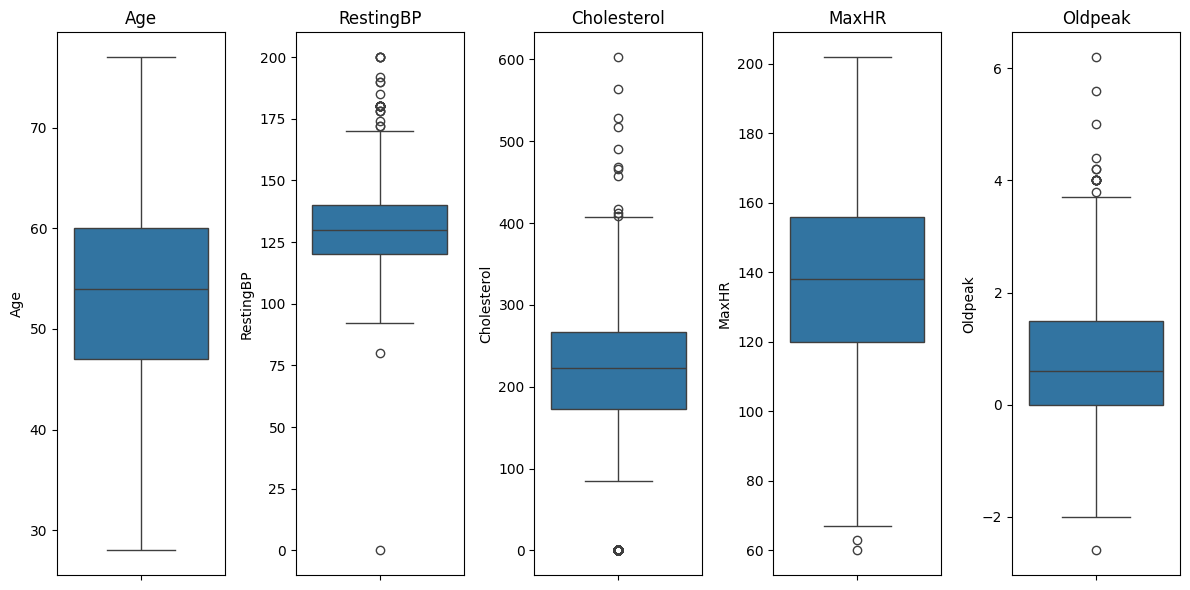

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables (exclude encoded categorical)
numeric_cols = [
    'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'
]

# Create boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Interpretation: Outliers

#### Age
- No extreme outliers — distribution looks reasonable. - **Keep as is.**  

#### RestingBP
- Several high outliers (≥180–200 mmHg) and a few strange very low values, including **0** (physiologically impossible).  
- The “0” value is likely a data entry error → should be removed or imputed.  
- High values could be genuine hypertensive patients, so don’t remove blindly — consider domain knowledge.

#### Cholesterol
- A lot of high outliers (>400–600).  
- A value of **0** → not realistic → likely missing data encoded as 0. Needs correction/imputation.  
- High values might be biologically possible in extreme dyslipidemia but should be verified.

#### MaxHR
- Few low-end outliers (~60–70) might be normal for elderly or cardiac patients.  
- High values (~200) possible in younger patients. Likely okay, but check extremes with patient age.

#### Oldpeak
- Outliers above 4–6 → possible but rare.  
- A couple of negative values (e.g., -2) → might be measurement errors or a result of calculation formula.  
- Needs domain check (negative ST depression is not common).

---


| Variable     | Detected Issue(s)                                            | Suggested Action                                    |
|--------------|--------------------------------------------------------------|-----------------------------------------------------|
| Age          | No extreme outliers                                           | No action, unless capping for extreme ages needed   |
| RestingBP    | High outliers (≥180–200), unrealistic 0 values                | Replace 0 with NaN; review high values with domain  |
| Cholesterol  | Many high outliers (>400–600), unrealistic 0 values           | Replace 0 with NaN; cap if medically implausible    |
| MaxHR        | Low-end (~60–70); high (~200)   | Likely valid;                    |
| Oldpeak      | High (>4–6) rare; negative values                             | Set negatives to NaN; review high extremes          |


### Outlier Treatment: RestingBP

In [14]:
import numpy as np

# Ensure numeric
df['RestingBP'] = df['RestingBP'].astype(float)

# Replace impossible values (<= 0) with NaN
df['RestingBP'] = df['RestingBP'].apply(lambda x: np.nan if x <= 0 else x)

# Compute IQR and bounds
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

# Get median of inlier values
median_bp = df.loc[
    (df['RestingBP'] >= lower_bound) & (df['RestingBP'] <= upper_bound),
    'RestingBP'
].median()

impute_mask = df['RestingBP'].isna() | (df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound)
print(f"Total values to impute: {impute_mask.sum()}")


# Impute all invalid values (NaNs, below lower, above upper) in one step
df.loc[
    df['RestingBP'].isna() |
    (df['RestingBP'] < lower_bound) |
    (df['RestingBP'] > upper_bound),
    'RestingBP'
] = median_bp

# Confirm result
print(f"Imputed NaNs and outliers with median: {median_bp}")
print(f"New min RestingBP: {df['RestingBP'].min()}")
print(f"New max RestingBP: {df['RestingBP'].max()}")

IQR: 20.00
Lower Bound: 90.00, Upper Bound: 170.00
Total values to impute: 28
Imputed NaNs and outliers with median: 130.0
New min RestingBP: 92.0
New max RestingBP: 170.0


### Outlier Treatment: Cholesterol

In [15]:
import numpy as np

# Ensure float type
df['Cholesterol'] = df['Cholesterol'].astype(float)

# Step 1 — Replace impossible 0 values with NaN
df['Cholesterol'] = df['Cholesterol'].apply(lambda x: np.nan if x == 0 else x)

# Step 2 — Calculate IQR bounds
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")

# Step 3 — Median of inliers (between bounds)
median_chol = df.loc[
    (df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound),
    'Cholesterol'
].median()

# Step 4 — Impute NaNs and values below lower bound with median
df.loc[df['Cholesterol'].isna() | (df['Cholesterol'] < lower_bound), 'Cholesterol'] = median_chol

# Step 5 — Cap values above upper bound
df.loc[df['Cholesterol'] > upper_bound, 'Cholesterol'] = upper_bound

# Final check
print(f"Median used for low outliers: {median_chol}")
print(f"Min after cleaning: {df['Cholesterol'].min()}, Max after cleaning: {df['Cholesterol'].max()}")


Lower bound: 105.62, Upper bound: 376.62
Median used for low outliers: 236.0
Min after cleaning: 110.0, Max after cleaning: 376.625


### Outlier Treatment: MaxHR

In [16]:
# Ensure numeric
df['MaxHR'] = df['MaxHR'].astype(float)

# Step 1 — Replace impossible values (≤ 0 bpm) with NaN
df['MaxHR'] = df['MaxHR'].apply(lambda x: np.nan if x <= 0 else x)

# Step 2 — Calculate IQR bounds
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Values below lower bound: {(df['MaxHR'] < lower_bound).sum()}")
print(f"Values above upper bound: {(df['MaxHR'] > upper_bound).sum()} (left unchanged)")

# Step 3 — Get median of valid (inlier) values
median_maxhr = df.loc[
    (df['MaxHR'] >= lower_bound) & (df['MaxHR'] <= upper_bound),
    'MaxHR'
].median()

# Step 4 — Impute only NaNs and low outliers (< lower bound) with median
df.loc[
    df['MaxHR'].isna() | (df['MaxHR'] < lower_bound),
    'MaxHR'
] = median_maxhr

# Final check
print(f"Imputed NaNs and low outliers with median: {median_maxhr}")
print(f"Min MaxHR after cleaning: {df['MaxHR'].min()}")
print(f"Max MaxHR after cleaning: {df['MaxHR'].max()}")


IQR: 36.00
Lower Bound: 66.00, Upper Bound: 210.00
Values below lower bound: 2
Values above upper bound: 0 (left unchanged)
Imputed NaNs and low outliers with median: 138.0
Min MaxHR after cleaning: 67.0
Max MaxHR after cleaning: 202.0


### Outlier Treatment: Oldpeak

In [17]:
# Ensure numeric
df['Oldpeak'] = df['Oldpeak'].astype(float)

# 1 — Replace impossible values (negative ST depression is uncommon → set to NaN)
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: np.nan if x < 0 else x)

# 2 — Calculate IQR bounds
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Values below lower bound: {(df['Oldpeak'] < lower_bound).sum()}")
print(f"Values above upper bound: {(df['Oldpeak'] > upper_bound).sum()}")

# 3 — Median of inliers
median_oldpeak = df.loc[
    (df['Oldpeak'] >= lower_bound) & (df['Oldpeak'] <= upper_bound),
    'Oldpeak'
].median()

# 4 — Impute NaNs and outliers (both low & high) with median
df.loc[
    df['Oldpeak'].isna() | (df['Oldpeak'] < lower_bound) | (df['Oldpeak'] > upper_bound),
    'Oldpeak'
] = median_oldpeak

print(f"Oldpeak NaNs/outliers imputed with median: {median_oldpeak}")
print(f"Min Oldpeak after cleaning: {df['Oldpeak'].min()}")
print(f"Max Oldpeak after cleaning: {df['Oldpeak'].max()}")

IQR: 1.50
Lower Bound: -2.25, Upper Bound: 3.75
Values below lower bound: 0
Values above upper bound: 15
Oldpeak NaNs/outliers imputed with median: 0.55
Min Oldpeak after cleaning: 0.0
Max Oldpeak after cleaning: 3.7


In [18]:
# Summary statistics after cleaning 
summary = df.describe()
print(summary)

              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       2.251634  131.079521   242.014706   
std      9.432617    0.407701       0.931031   15.597206    46.923458   
min     28.000000    0.000000       0.000000   92.000000   110.000000   
25%     47.000000    1.000000       2.000000  120.000000   215.000000   
50%     54.000000    1.000000       3.000000  130.000000   236.000000   
75%     60.000000    1.000000       3.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  170.000000   376.625000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.603486  136.976035        0.404139    0.846841   
std      0.423046    0.805968   25.215656        0.490992    0.937278   
min      0.000000    0.000000   67.000000        0

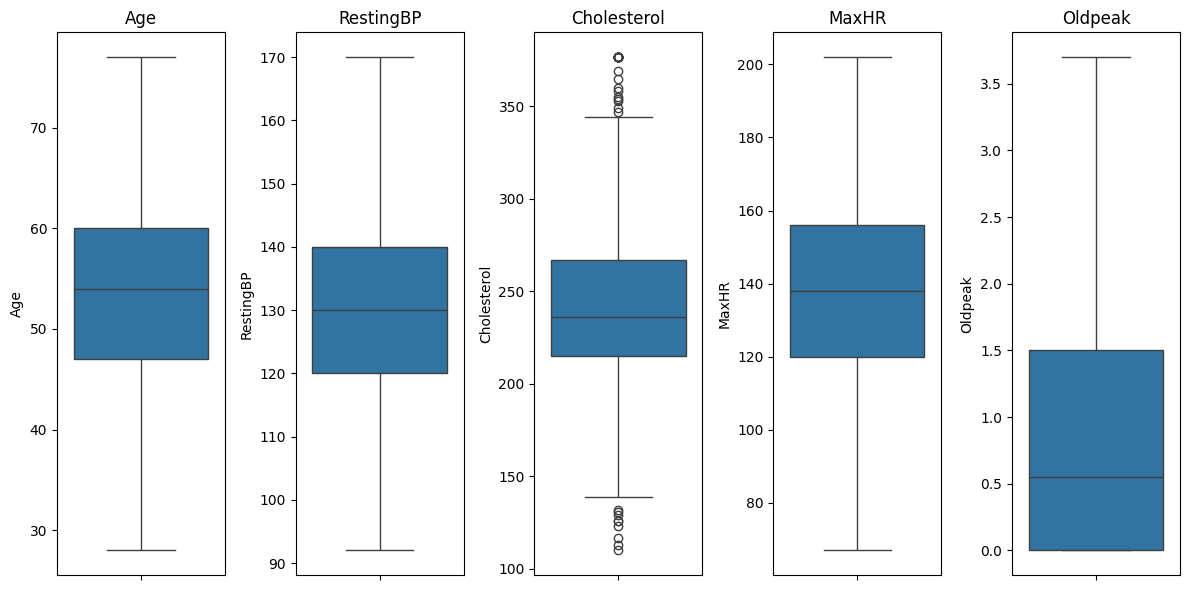

In [19]:
# print the boxplots again 
# List of numeric variables (exclude encoded categorical)
numeric_cols = [
    'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'
]

# Create boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Overview about the correlations: Correlation Matrix

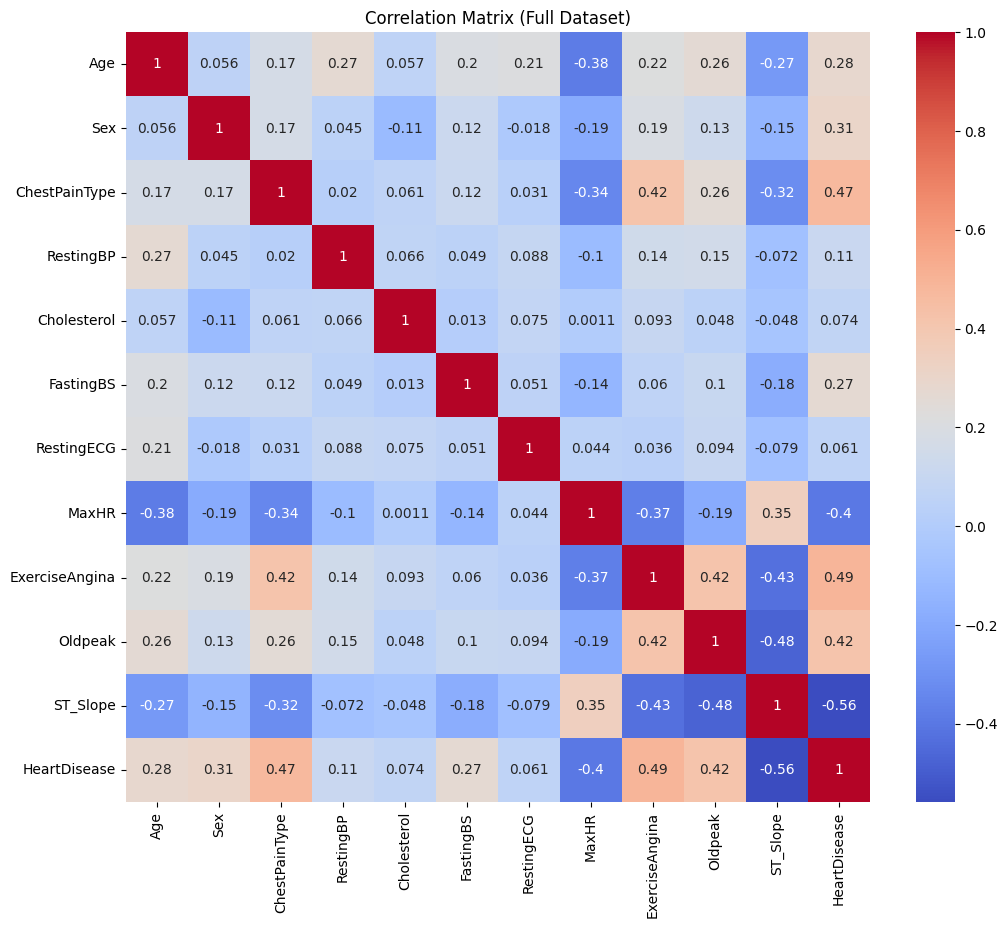

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix using full dataset
corr_matrix_full = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Full Dataset)")
plt.show()


## Correlation Matrix Interpretation

### Key Insights

1. **Strongest correlations with HeartDisease**
   - **Negative:**
     - `MaxHR` (-0.40) → Higher maximum heart rate is linked to *lower* heart disease incidence.
     - `ST_Slope` (-0.56) → Upward slope is strongly associated with reduced heart disease risk.
   - **Positive:**
     - `ChestPainType` (0.47) → Certain chest pain types correlate with higher heart disease prevalence.
     - `ExerciseAngina` (0.49) → Presence of exercise-induced angina is strongly linked to heart disease.
     - `Oldpeak` (0.42) → Higher ST depression is associated with increased heart disease risk.

2. **Notable inter-variable correlations**
   - `ExerciseAngina` ↔ `Oldpeak` (0.42) → Angina during exercise often occurs alongside elevated ST depression.
   - `ST_Slope` ↔ `Oldpeak` (-0.48) → Steeper slopes correspond to lower ST depression.
   - `ST_Slope` ↔ `ExerciseAngina` (-0.43) → Upward slope linked with absence of exercise-induced angina.

3. **Weak correlations**
   - `Age` (0.28) and `Cholesterol` (0.07) have weak positive associations with HeartDisease.
   - `RestingBP`, `FastingBS`, and `RestingECG` show minimal correlation with HeartDisease.

---

### Overall Summary
- Heart disease in this dataset appears **most strongly linked to exercise-related variables (`MaxHR`, `ExerciseAngina`, `Oldpeak`, `ST_Slope`)** and **chest pain type**.
- Traditional cardiovascular risk factors like cholesterol and fasting blood sugar show **weak correlations** here, possibly due to dataset-specific characteristics.
- ST-related measures and exercise responses may have higher predictive value for modeling than resting measurements.

### Exploration of the Target Variable (CVD Presence)

In [21]:
#see the distribution of the target variable 
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

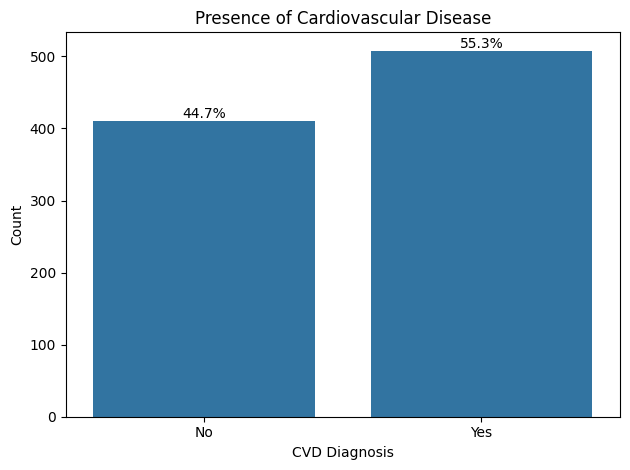

HeartDisease
Yes    0.553377
No     0.446623
Name: proportion, dtype: float64


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map target values to labels
df_target = df.copy()
df_target['HeartDisease'] = df_target['HeartDisease'].map({0: 'No', 1: 'Yes'})

# Plot
ax = sns.countplot(x='HeartDisease', data=df_target)
plt.title("Presence of Cardiovascular Disease")
plt.xlabel("CVD Diagnosis")
plt.ylabel("Count")

# Add percentage labels
total = len(df_target)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Optional: Print percentages to console
print(df_target['HeartDisease'].value_counts(normalize=True))

#### Exploration of the Gender distribution

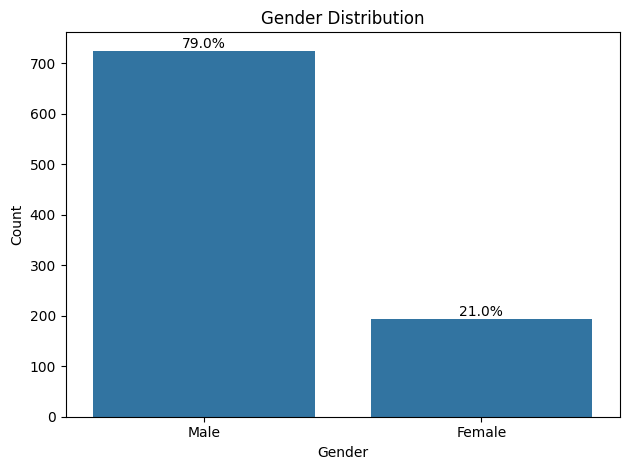

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map gender values to labels
df_gender = df.copy()
df_gender['Sex'] = df_gender['Sex'].map({0: 'Female', 1: 'Male'})

# Plot
ax = sns.countplot(x='Sex', data=df_gender)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add percentages on bars
total = len(df_gender)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

The original data set has an underlying distribution of 79% males and 21% females, which could lead to significant bias in the algorithm's performance for females.

### Exploration of the gender-wise distribution of CVD Presence

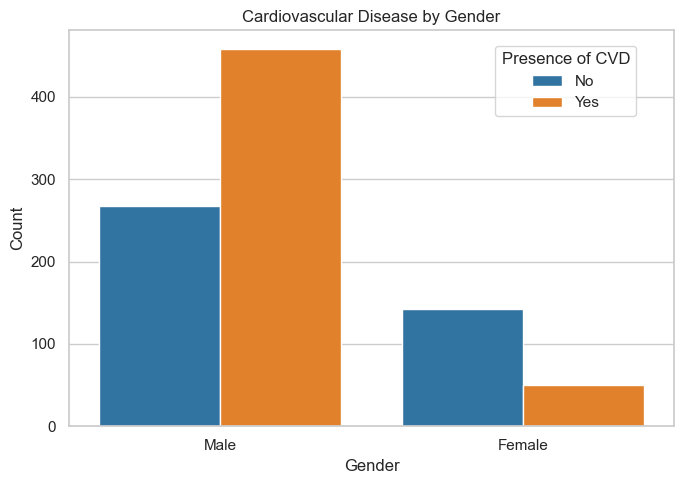

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
df_plot = df.copy()
df_plot['Sex'] = df_plot['Sex'].map({0: 'Female', 1: 'Male'})
df_plot['HeartDisease'] = df_plot['HeartDisease'].map({0: 'No', 1: 'Yes'})  # for legend clarity

# Set seaborn style
sns.set(style="whitegrid")

# Use a colorblind-safe palette: Blue for No, Orange for Yes
custom_palette = {'No': '#1f77b4', 'Yes': '#ff7f0e'}  # Blue, Orange

# Create the plot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Sex', hue='HeartDisease', data=df_plot, palette=custom_palette)

# Titles and labels
plt.title("Cardiovascular Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Updated legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Presence of CVD",
    loc='upper right',
    bbox_to_anchor=(0.95, 0.98)
)

plt.tight_layout()
plt.show()

In [25]:
# Gender-wise cardio outcome
pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index')

HeartDisease,0,1
Sex,,
0,0.740933,0.259067
1,0.368276,0.631724


## Interpreation:

- **Gender = 0 (Female)**:
  - 74.1% do **not** have heart disease.
  - 25.9% have heart disease.

- **Gender = 1 (Male)**:
  - 36.8% do **not** have heart disease.
  - 63.2% have heart disease.

### Interpretation
Heart disease prevalence is notably higher among males (63.2%) compared to females (25.9%) in this dataset. Conversely, the majority of females do not have heart disease, while most males are affected.

---

### Dataset Creation for our Experiments in context of Bias-detection:

With the following three dataset compositions:

1. **Male-skewed (75/25)** — more **men** than **women**.
2. **Female-skewed (75/25)** — more **women** than **men**.
3. **Balanced (50/50)** — equal numbers of **men** and **women**.

In [26]:
# first of all save the original dataset to CSV
df.to_csv('ClevelandCombinedDataset.csv', index=False)

In [27]:
df['Sex'].value_counts()

Sex
1    725
0    193
Name: count, dtype: int64

In [28]:
df.groupby('Sex')['HeartDisease'].value_counts(normalize=True).unstack()

HeartDisease,0,1
Sex,,
0,0.740933,0.259067
1,0.368276,0.631724


In [29]:
# Train/Test split from ORIGINAL (cleaned) data 

from pathlib import Path
from sklearn.model_selection import train_test_split

TARGET = "HeartDisease"
SENSITIVE = "Sex"  # for summaries only

# 1) Separate features/target
X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Split once (stratify on label)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# 3) Save to disk (freeze test set)
out_dir = Path("data_splits")
out_dir.mkdir(parents=True, exist_ok=True)

X_train.to_csv(out_dir / "X_train.csv", index=False)
y_train.to_frame(name=TARGET).to_csv(out_dir / "y_train.csv", index=False)
X_test.to_csv(out_dir / "X_test.csv", index=False)
y_test.to_frame(name=TARGET).to_csv(out_dir / "y_test.csv", index=False)

print("Saved splits to:", out_dir.resolve())

# 4) Sanity summaries
def summarize_split(Xp, yp, name):
    print(f"\n=== {name} ===")
    print("Size:", len(yp))
    print("Outcome distribution:")
    print(yp.value_counts().rename({0:"NoDisease(0)", 1:"Disease(1)"}))
    if SENSITIVE in Xp.columns:
        print("\nGender distribution:")
        print(Xp[SENSITIVE].map({0:"Female",1:"Male"}).value_counts())
        print("\nOutcome by gender:")
        print(pd.crosstab(Xp[SENSITIVE].map({0:"Female",1:"Male"}), yp,
                          rownames=[SENSITIVE], colnames=[TARGET]))

summarize_split(X_train, y_train, "TRAIN")
summarize_split(X_test, y_test, "TEST")

# 5)exact-duplicate leakage check (should be zero)
def hashed_rows(df_part: pd.DataFrame) -> pd.Series:
    # hash rows as strings to detect exact duplicates across splits
    return pd.util.hash_pandas_object(df_part.astype(str), index=False)

leak = len(set(hashed_rows(X_train)) & set(hashed_rows(X_test)))
print(f"\nExact duplicate rows across TRAIN and TEST: {leak}  (expected: 0)")

Saved splits to: D:\DigiEcon\MasterThesis\Technical Implementation\Code Files\Dataset3\data_splits

=== TRAIN ===
Size: 734
Outcome distribution:
HeartDisease
Disease(1)      406
NoDisease(0)    328
Name: count, dtype: int64

Gender distribution:
Sex
Male      579
Female    155
Name: count, dtype: int64

Outcome by gender:
HeartDisease    0    1
Sex                   
Female        111   44
Male          217  362

=== TEST ===
Size: 184
Outcome distribution:
HeartDisease
Disease(1)      102
NoDisease(0)     82
Name: count, dtype: int64

Gender distribution:
Sex
Male      146
Female     38
Name: count, dtype: int64

Outcome by gender:
HeartDisease   0   1
Sex                 
Female        32   6
Male          50  96

Exact duplicate rows across TRAIN and TEST: 0  (expected: 0)


To ensure a balanced dataset with equal representation across gender and CVD status, we define four subgroups (male/female × CVD = 0/1) and target an equal number of samples (e.g., 150) per group, resulting in a total dataset size of 600. Among these, the subgroup Male with CVD = 1 has the fewest available samples and therefore requires upsampling. All other subgroups have sufficient data and can be sampled without replacement.

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

#load data splits
in_dir = Path("data_splits")
X_train = pd.read_csv(in_dir / "X_train.csv")
y_train = pd.read_csv(in_dir / "y_train.csv")

train_pool = X_train.copy()
train_pool["HeartDisease"] = y_train["HeartDisease"]

TARGET = "HeartDisease"
SENSITIVE = "Sex"  # 1=Male, 0=Female

# Helper function to create a balanced dataset with desired male ratio 
def create_balanced_dataset(df, total_size=600, male_ratio=0.5, seed=42):
    rng = np.random.default_rng(seed)

    # Step 1: balance outcomes globally
    n_total = total_size
    n_pos = n_total // 2
    n_neg = n_total - n_pos

    pos = df[df[TARGET] == 1]
    neg = df[df[TARGET] == 0]

    # Step 2: assign gender counts per outcome
    n_pos_male = int(round(n_pos * male_ratio))
    n_pos_female = n_pos - n_pos_male
    n_neg_male = int(round(n_neg * male_ratio))
    n_neg_female = n_neg - n_neg_male

    samples = []
    for subset, n_m, n_f in [(pos, n_pos_male, n_pos_female),
                             (neg, n_neg_male, n_neg_female)]:
        males = subset[subset[SENSITIVE] == 1]
        females = subset[subset[SENSITIVE] == 0]

        repM = len(males) < n_m
        repF = len(females) < n_f

        takeM = males.sample(n=n_m, replace=repM, random_state=seed)
        takeF = females.sample(n=n_f, replace=repF, random_state=seed+1)
        samples.extend([takeM, takeF])

    df_balanced = pd.concat(samples).sample(frac=1, random_state=seed).reset_index(drop=True)

    return df_balanced

# build datasets
datasets = {
    "50_50": create_balanced_dataset(train_pool, total_size=600, male_ratio=0.50),
    "75M_25F": create_balanced_dataset(train_pool, total_size=600, male_ratio=0.75),
    "25M_75F": create_balanced_dataset(train_pool, total_size=600, male_ratio=0.25),
}

# Save subsets
out_dir = Path("data_subsets")
out_dir.mkdir(parents=True, exist_ok=True)

for name, dataset in datasets.items():
    dataset.to_csv(out_dir / f"train_{name}.csv", index=False)
    print(f"Saved {name} subset with shape {dataset.shape} to {out_dir/f'train_{name}.csv'}")

#Check summaries
for name, dataset in datasets.items():
    print(f"\n{name} - Gender Distribution:")
    print(dataset[SENSITIVE].map({0:"Female", 1:"Male"}).value_counts())
    print(f"{name} - HeartDisease Distribution:")
    print(dataset[TARGET].value_counts())
    print(f"{name} - Gender + HeartDisease Breakdown:")
    print(dataset.groupby([SENSITIVE, TARGET]).size())


Saved 50_50 subset with shape (600, 12) to data_subsets\train_50_50.csv
Saved 75M_25F subset with shape (600, 12) to data_subsets\train_75M_25F.csv
Saved 25M_75F subset with shape (600, 12) to data_subsets\train_25M_75F.csv

50_50 - Gender Distribution:
Sex
Male      300
Female    300
Name: count, dtype: int64
50_50 - HeartDisease Distribution:
HeartDisease
1    300
0    300
Name: count, dtype: int64
50_50 - Gender + HeartDisease Breakdown:
Sex  HeartDisease
0    0               150
     1               150
1    0               150
     1               150
dtype: int64

75M_25F - Gender Distribution:
Sex
Male      450
Female    150
Name: count, dtype: int64
75M_25F - HeartDisease Distribution:
HeartDisease
1    300
0    300
Name: count, dtype: int64
75M_25F - Gender + HeartDisease Breakdown:
Sex  HeartDisease
0    0                75
     1                75
1    0               225
     1               225
dtype: int64

25M_75F - Gender Distribution:
Sex
Female    450
Male      150
Na

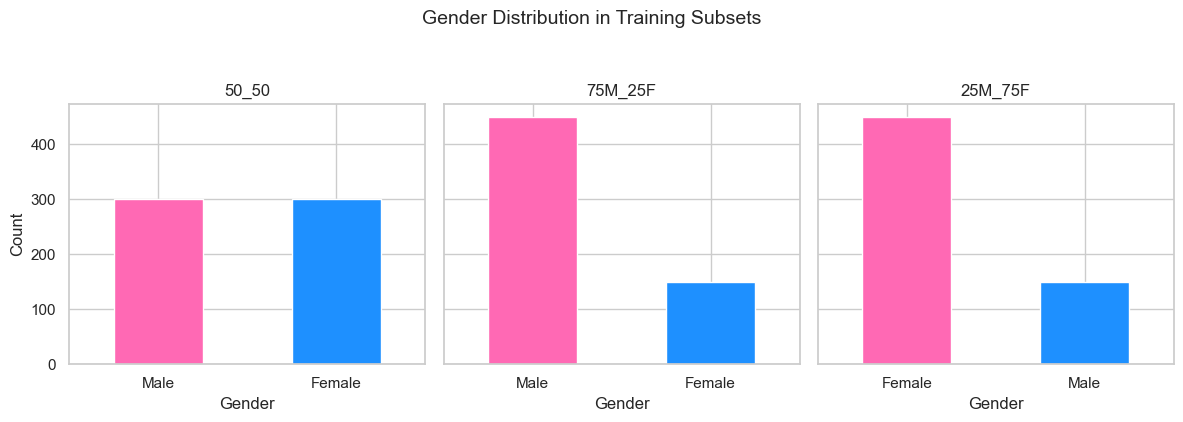

In [31]:
#final check to confirm the correct gender distribution
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load subsets
subsets_dir = Path("data_subsets")

datasets = {
    "50_50": pd.read_csv(subsets_dir / "train_50_50.csv"),
    "75M_25F": pd.read_csv(subsets_dir / "train_75M_25F.csv"),
    "25M_75F": pd.read_csv(subsets_dir / "train_25M_75F.csv"),
}

# Plot gender distribution for each subset
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, (name, df) in zip(axes, datasets.items()):
    counts = df["Sex"].map({0:"Female", 1:"Male"}).value_counts()
    counts.plot(kind="bar", ax=ax, color=["#FF69B4", "#1E90FF"], rot=0)
    ax.set_title(name)
    ax.set_ylabel("Count")
    ax.set_xlabel("Gender")

plt.suptitle("Gender Distribution in Training Subsets", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()